# Model

In [15]:
#Librarys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sys
sys.path.append('../')
from helper.lazy_regression import TooLazyForRegression


In [16]:
#Import data
df_mpa = pd.read_csv("../data/data_mpa.txt", sep=" ")
df_spg = pd.read_csv("../data/data_spg.txt", sep=" ")
df_sps = pd.read_csv("../data/data_sps.txt", sep=" ")

In [57]:
df_mpa[:100].to_csv(r'df_mpa.txt', header=None, index=None, sep=' ', mode='a')

## Data-Pre-Process

In [17]:
df_mpa = df_mpa.rename(columns={"len_M01": "len"})
df_mpa = df_mpa.drop(['len_M02', 'len_M03', 'len_M04'], axis=1)
df_spg = df_spg.rename(columns={"len_G01": "len"})
df_spg = df_spg.drop(['len_G02'], axis=1)
df_sps = df_sps.rename(columns={"len_G01": "len"})
df_sps = df_sps.drop(['len_G02', 'len_M01', 'len_S01'], axis=1)

## 1. MPA

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
from helper.lazy_regression import TooLazyForRegression

In [11]:
data = df_mpa
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(data)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 16/16 [13:36<00:00, 51.03s/it]


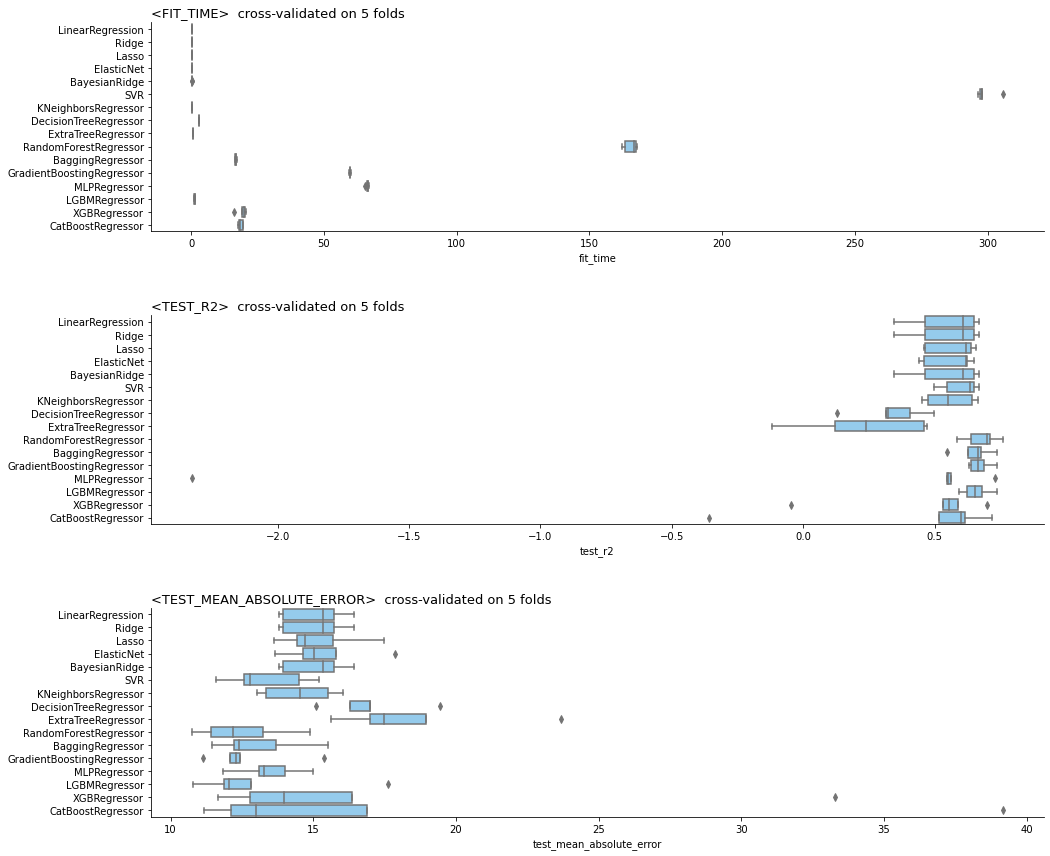

In [12]:
lazy.plot_report(plot_include_time=True)

## 2. SPG

In [19]:
data = df_spg
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(data)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 16/16 [04:21<00:00, 16.37s/it]


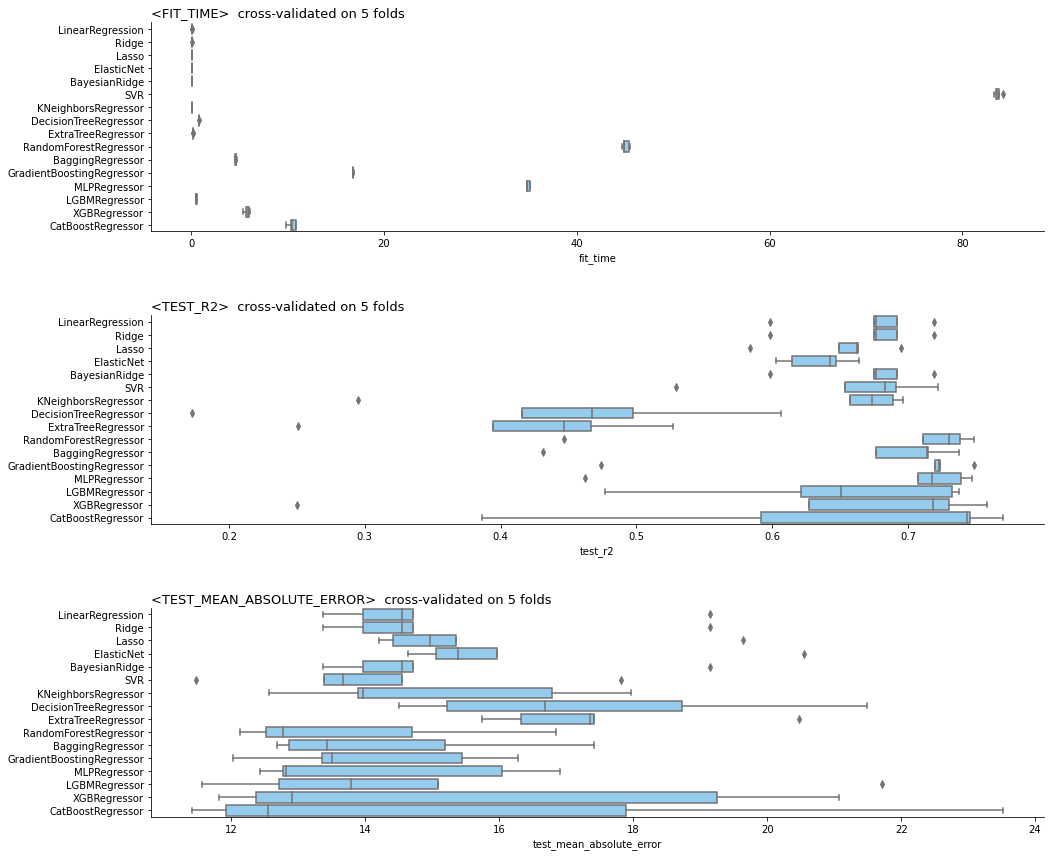

In [20]:
lazy.plot_report(plot_include_time=True)

## 3. SPS

In [21]:
data = df_sps
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(data)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 16/16 [00:52<00:00,  3.25s/it]


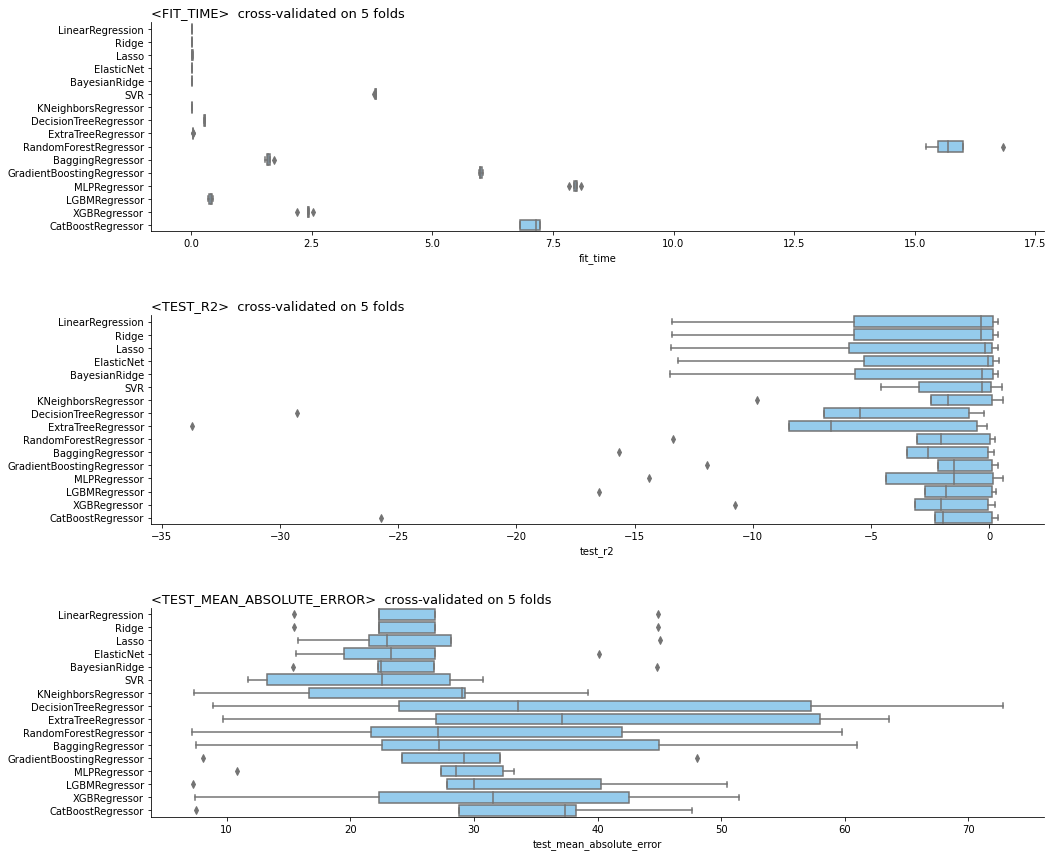

In [22]:
lazy.plot_report(plot_include_time=True)

## XGB Regession Test MPA

In [29]:
# Train Test Split of Dataframe
df_xgb = df_mpa.drop(['start_time'], axis=1)
X, y = df_xgb.drop(['size_mm'], axis=1), df_xgb['size_mm']
y =y.astype(np.str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 102)

In [30]:
# Transform y to normal distribution 
#y_train = np.log1p(y_train)
model= xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# make predictions for test data
y_pred = model.predict(X_test)
print('R2-Score: ', model.score(X_train, y_train))

R2-Score:  0.8740667060642303


## CatB Regession Test MPA

In [33]:
from catboost import CatBoostRegressor

In [34]:
model = CatBoostRegressor()
model.fit(X_train, y_train)

Learning rate set to 0.080004
0:	learn: 32.7717315	total: 164ms	remaining: 2m 43s
1:	learn: 31.2687277	total: 170ms	remaining: 1m 24s
2:	learn: 29.9210110	total: 177ms	remaining: 58.8s
3:	learn: 28.6855442	total: 183ms	remaining: 45.6s
4:	learn: 27.5870049	total: 190ms	remaining: 37.8s
5:	learn: 26.6105325	total: 197ms	remaining: 32.6s
6:	learn: 25.7297294	total: 204ms	remaining: 28.9s
7:	learn: 24.9486101	total: 210ms	remaining: 26s
8:	learn: 24.2682609	total: 216ms	remaining: 23.8s
9:	learn: 23.6627498	total: 223ms	remaining: 22s
10:	learn: 23.1348132	total: 229ms	remaining: 20.6s
11:	learn: 22.6542924	total: 235ms	remaining: 19.4s
12:	learn: 22.2119954	total: 242ms	remaining: 18.3s
13:	learn: 21.8243487	total: 248ms	remaining: 17.4s
14:	learn: 21.4631181	total: 254ms	remaining: 16.7s
15:	learn: 21.1535120	total: 260ms	remaining: 16s
16:	learn: 20.8807491	total: 266ms	remaining: 15.4s
17:	learn: 20.6108445	total: 272ms	remaining: 14.9s
18:	learn: 20.3846748	total: 278ms	remaining: 14

In [35]:
# Get predictions
y_pred = model.predict(X_test)
print('R2-Score: ', model.score(X_train, y_train))

R2-Score:  0.8540028991270718


In [39]:
liste = ["a","b","c"]

In [ ]:
test = 'Bilder/', str(i), '.png'
        new_liste = ''.join(test)

In [48]:
for i in liste:
    test = i," PD Report"
    new_liste = ''.join(test)
    print(new_liste)

a PD Report
b PD Report
c PD Report


In [52]:
import pandas as pd
import pandas_profiling
import os
import re

print('Start Process...')

# Extract text file data from data dir
data_files = os.listdir('../data')
data_files = [f for f in data_files if '.txt' in f]

# Make new dir report if not exists

for file in data_files:
    print(file[5:8])

Start Process...
mpa
spg
sps
